In [288]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [442]:
data_num = 100000

with open('/Users/zch/Downloads/train_data_output.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
#     i = 0
    record = []
    for row in reader:
#         i += 1
#         if i > data_num:
#             break
        record.append(row)

In [443]:
df = pd.DataFrame(record[1:], columns=record[0])

In [495]:
df[:3]

,turn_num,move_name,op_name,my_hp,op_hp,my_type1,my_type2,op_type1,op_type2,my_status,op_status,my_speed,op_speed,win
0,turn1,Slash,Metapod,138,110,Fire,Flying,Bug,,0,0,5005,1505,True
1,turn2,Slash,Metapod,132.0,68.0,Fire,Flying,Bug,,0,0,5005,1505,True
2,turn3,Flamethrower,Metapod,132.0,21.0,Fire,Flying,Bug,,0,0,5005,1505,True


In [496]:
len(df["op_name"].unique())

151

In [497]:
len(df[df["win"]=="True"]["op_name"].unique())

148

MIN:  3119
Water       67789
Normal      63151
Fire        38165
Poison      38088
Grass       25981
Bug         25486
Psychic     24373
Rock        24368
Electric    20012
Ground      20011
Fighting    15785
Dragon      11300
Ghost        7429
Ice          3119
Name: op_type1, dtype: int64


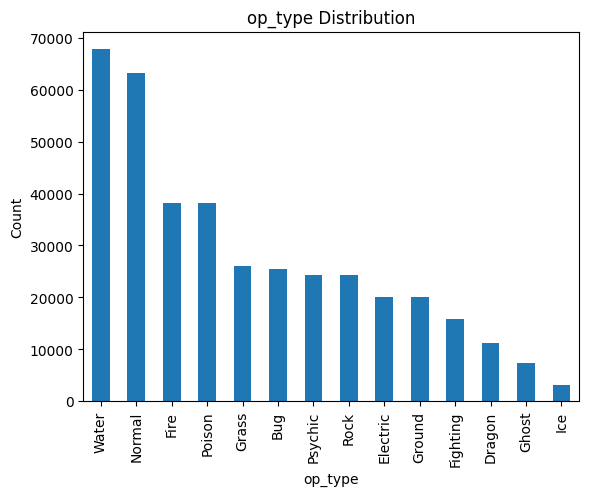

In [498]:
# 出现次数最少

type_counts = df['op_type1'].value_counts()
print("MIN: ", min(type_counts))
print(type_counts)
type_counts.plot(kind='bar')

plt.title('op_type Distribution')
plt.xlabel('op_type')
plt.ylabel('Count')

plt.show()

In [499]:
stand_record = pd.DataFrame([],columns=record[0])

In [500]:
# 有可能是因为normal的精灵太多了，应该先把151个宝可梦的属性统计起来，然后找一个最少的属性, 已这个最少的属性的数量随机抽数据再抓取
stand_record = pd.DataFrame([],columns=record[0])
# df = pd.concat([df1, df2])
for t in df["op_type1"].unique():
    stand_record = pd.concat([stand_record, df[df["op_type1"]==t].sample(n=min(type_counts))])
# np.random.choice(df[df["op_type1"]=="Water"], size=100, replace=False)
stand_record

,turn_num,move_name,op_name,my_hp,op_hp,my_type1,my_type2,op_type1,op_type2,my_status,op_status,my_speed,op_speed,win
189307,turn1,Dragon Rage,Beedrill,138,125,Fire,Flying,Bug,Poison,0,0,5005,3755,True
232155,turn1,Leer,Kakuna,138,105,Fire,Flying,Bug,Poison,0,0,5005,1755,True
330360,turn1,Slash,Butterfree,138,120,Fire,Flying,Bug,Flying,0,0,5005,3505,True
246462,turn2,Leer,Kakuna,138,65,Fire,Flying,Bug,Poison,0,0,5005,1755,True
50884,turn2,Dragon Rage,Pinsir,103.0,125,Fire,Flying,Bug,,0,0,5005,4255,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375981,turn7,Slash,Dratini,93.0,39.0,Fire,Flying,Dragon,,4,0,5005,2505,True
113353,turn6,Dragon Rage,Dratini,138,17.0,Fire,Flying,Dragon,,4,0,5005,2505,True
29018,turn7,Dragon Rage,Dragonair,43.0,44.0,Fire,Flying,Dragon,,4,0,5005,3505,True
301728,turn6,Leer,Dragonair,38.0,43.0,Fire,Flying,Dragon,,4,0,5005,3505,False


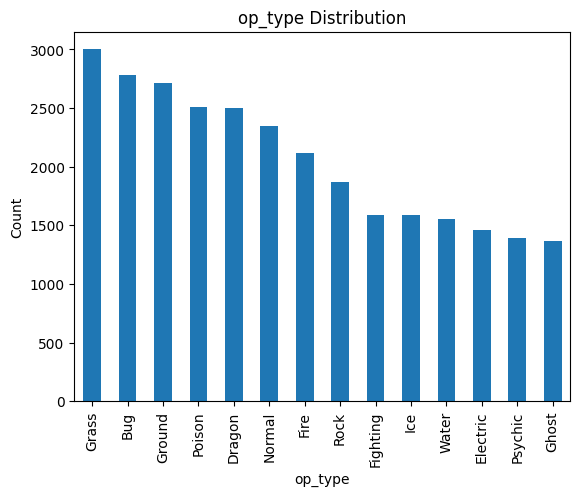

In [501]:
type_counts = stand_record[stand_record["win"]=="True"]["op_type1"].value_counts()
# bar plot
type_counts.plot(kind='bar')

plt.title('op_type Distribution')
plt.xlabel('op_type')
plt.ylabel('Count')

plt.show()

In [502]:
type_counts/min(stand_record['op_type1'].value_counts())

Grass       0.962167
Bug         0.891632
Ground      0.869830
Poison      0.804104
Dragon      0.800256
Normal      0.752485
Fire        0.677461
Rock        0.598589
Fighting    0.509138
Ice         0.508496
Water       0.497275
Electric    0.467137
Psychic     0.446297
Ghost       0.439243
Name: op_type1, dtype: float64

In [503]:
from sklearn.preprocessing import MinMaxScaler

In [504]:
from sklearn.preprocessing import StandardScaler

In [505]:
win_record = stand_record[stand_record["win"]=="True"]
win_record['op_type1'].value_counts()

Grass       3001
Bug         2781
Ground      2713
Poison      2508
Dragon      2496
Normal      2347
Fire        2113
Rock        1867
Fighting    1588
Ice         1586
Water       1551
Electric    1457
Psychic     1392
Ghost       1370
Name: op_type1, dtype: int64

In [506]:
# Normalization
type_percentages_real = type_counts / min(stand_record['op_type1'].value_counts())
type_percent_real = pd.DataFrame(list(type_percentages_real.items()), columns = ["type", "percent"])
type_percentages = 1 - type_counts / type_counts.sum()
type_percent = pd.DataFrame(list(type_percentages.items()), columns = ["type", "percent"])

scaler = MinMaxScaler(feature_range=(0.2, 1))

normal_type_percent = scaler.fit_transform(type_percent[["percent"]])
normal_type_percent = pd.concat([type_percent_real, pd.DataFrame(normal_type_percent, columns=["normal_percent"])], axis=1)
normal_type_percent

,type,percent,normal_percent
0,Grass,0.962167,0.200000
1,Bug,0.891632,0.307909
2,Ground,0.869830,0.341263
3,Poison,0.804104,0.441815
4,Dragon,0.800256,0.447701
5,Normal,0.752485,0.520785
6,Fire,0.677461,0.635561
7,Rock,0.598589,0.756223
8,Fighting,0.509138,0.893072
9,Ice,0.508496,0.894053


In [507]:
result

,turn_num,move_name,op_name,my_hp,op_hp,my_type1,my_type2,op_type1,op_type2,my_status,op_status,my_speed,op_speed,win
175920,turn4,Dragon Rage,Exeggutor,85.0,50.0,Fire,Flying,Grass,Psychic,0,0,5005,2755,True
178954,turn3,Leer,Vileplume,138,95,Fire,Flying,Grass,Poison,0,0,5005,2505,True
326892,turn1,Dragon Rage,Exeggcute,138,120,Fire,Flying,Grass,Psychic,0,0,5005,2005,True
326659,turn1,Dragon Rage,Weepinbell,138,125,Fire,Flying,Grass,Poison,0,0,5005,2755,True
282974,turn3,Flamethrower,Victreebel,117.0,100,Fire,Flying,Grass,Poison,0,0,5005,3505,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309651,turn3,Flamethrower,Gengar,101.0,80,Fire,Flying,Ghost,Poison,5,0,5005,5505,True
254663,turn2,Dragon Rage,Gastly,128.0,50,Fire,Flying,Ghost,Poison,0,0,5005,4005,True
3113,turn1,Slash,Haunter,138,105,Fire,Flying,Ghost,Poison,0,0,5005,4755,True
152673,turn3,Slash,Gengar,90.0,80.0,Fire,Flying,Ghost,Poison,0,0,5005,5505,True


In [508]:
# sample according to the inverse-percent
result = pd.DataFrame(columns=df.columns)

for t in type_counts.index:
    temp = win_record[win_record['op_type1'] == t].sample(\
                    frac=float(normal_type_percent[normal_type_percent["type"]==t]["normal_percent"]))
    result = pd.concat([result, temp])
result

,turn_num,move_name,op_name,my_hp,op_hp,my_type1,my_type2,op_type1,op_type2,my_status,op_status,my_speed,op_speed,win
98443,turn1,Dragon Rage,Weepinbell,138,125,Fire,Flying,Grass,Poison,0,0,5005,2755,True
51547,turn2,Slash,Oddish,116.0,62.0,Fire,Flying,Grass,Poison,0,0,5005,1505,True
320683,turn2,Slash,Tangela,138,85,Fire,Flying,Grass,,0,0,5005,3005,True
344855,turn3,Dragon Rage,Gloom,120.0,83.0,Fire,Flying,Grass,Poison,4,0,5005,2005,True
20609,turn3,Leer,Tangela,135.0,125,Fire,Flying,Grass,,0,0,5005,3005,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141460,turn3,Leer,Haunter,109.0,105.0,Fire,Flying,Ghost,Poison,0,0,5005,4755,True
306395,turn1,Slash,Haunter,138,105,Fire,Flying,Ghost,Poison,0,0,5005,4755,True
210530,turn5,Flamethrower,Haunter,85.0,65,Fire,Flying,Ghost,Poison,5,0,5005,4755,True
156172,turn1,Slash,Gengar,138,120,Fire,Flying,Ghost,Poison,0,0,5005,5505,True


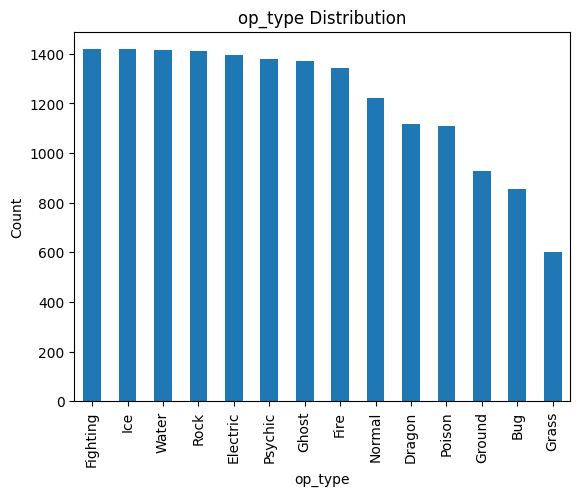

In [509]:
type_counts = result["op_type1"].value_counts()
# bar plot
type_counts.plot(kind='bar')

plt.title('op_type Distribution')
plt.xlabel('op_type')
plt.ylabel('Count')

plt.show()

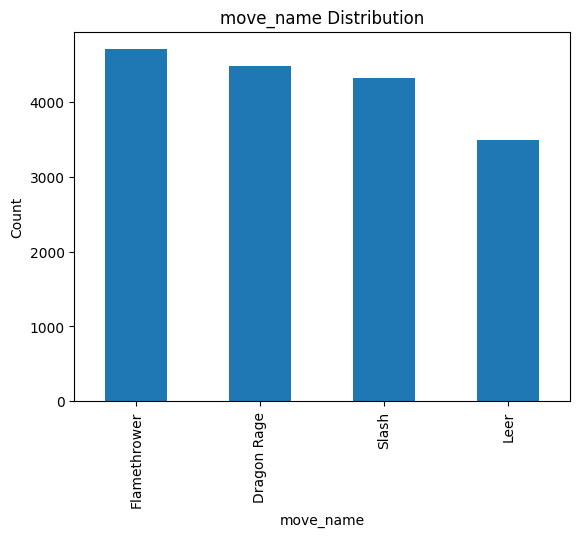

In [510]:
# op_type count
move_counts = result['move_name'].value_counts()

# bar plot
move_counts.plot(kind='bar')

plt.title('move_name Distribution')
plt.xlabel('move_name')
plt.ylabel('Count')

plt.show()

In [511]:
# # op_type count
# type_counts = df['op_type1'].value_counts()

# # bar plot
# type_counts.plot(kind='bar')

# plt.title('op_type Distribution')
# plt.xlabel('op_type')
# plt.ylabel('Count')

# plt.show()

In [520]:
result["my_speed"].unique()

array(['5005'], dtype=object)

In [552]:
X = result[["my_hp", "op_hp", "op_type1", "my_status", "op_status"]]

In [553]:
temp = {"Grass" : 0,
 'Bug':1,
 'Ground':2,
 'Poison':3,
 'Dragon':4,
 'Normal':5,
 'Fire':6,
 'Rock':7,
 'Ice':8,
 'Fighting':9,
 'Water':10,
 'Ghost':11,
 'Electric':12,
 'Psychic':13}

In [554]:
for i, t in enumerate(result["op_type1"].unique()):
    X.replace({'op_type1': {f'{t}': temp[t]}}, inplace=True)
    print(temp[t], t)

0 Grass
1 Bug
2 Ground
3 Poison
4 Dragon
5 Normal
6 Fire
7 Rock
9 Fighting
8 Ice
10 Water
12 Electric
13 Psychic
11 Ghost


/var/folders/yn/tcg080tn52v8gfv4d82tm89h0000gn/T/ipykernel_80942/2620699917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'op_type1': {f'{t}': temp[t]}}, inplace=True)


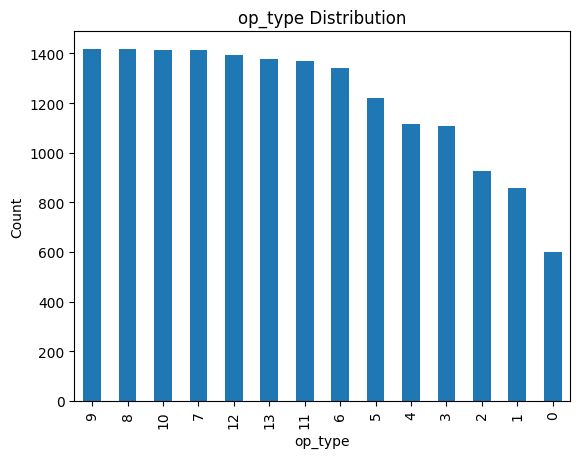

In [555]:
X["op_type1"].value_counts().plot(kind='bar')


plt.title('op_type Distribution')
plt.xlabel('op_type')
plt.ylabel('Count')

plt.show()

In [556]:
X

,my_hp,op_hp,op_type1,my_status,op_status
98443,138,125,0,0,0
51547,116.0,62.0,0,0,0
320683,138,85,0,0,0
344855,120.0,83.0,0,4,0
20609,135.0,125,0,0,0
...,...,...,...,...,...
141460,109.0,105.0,11,0,0
306395,138,105,11,0,0
210530,85.0,65,11,5,0
156172,138,120,11,0,0


In [557]:
temp = []
for i in range(len(X)):
    temp.append(X.iloc[i, :].to_list())

In [558]:
temp[:10]

[['138', '125', 0, '0', '0'],
 ['116.0', '62.0', 0, '0', '0'],
 ['138', '85', 0, '0', '0'],
 ['120.0', '83.0', 0, '4', '0'],
 ['135.0', '125', 0, '0', '0'],
 ['115.0', '7.0', 0, '0', '0'],
 ['25.0', '5.0', 0, '4', '0'],
 ['138', '63.0', 0, '0', '0'],
 ['94.0', '100.0', 0, '0', '0'],
 ['136.0', '66.0', 0, '0', '0']]

In [559]:
y = result[["move_name"]]

In [560]:
np.array(y)

array([['Dragon Rage'],
       ['Slash'],
       ['Slash'],
       ...,
       ['Flamethrower'],
       ['Slash'],
       ['Leer']], dtype=object)

In [561]:
for i, move in enumerate(y["move_name"].unique()):
    y.replace({'move_name': {f'{move}': i}}, inplace=True)
    print(i, move)

0 Dragon Rage
1 Slash
2 Leer
3 Flamethrower


/var/folders/yn/tcg080tn52v8gfv4d82tm89h0000gn/T/ipykernel_80942/521420463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'move_name': {f'{move}': i}}, inplace=True)


In [562]:
temp_y = []
for i in range(len(y)):
    temp_y.append(int(y.iloc[i, :]))

In [563]:
# idk = []
# for i, move in zip(temp_y, y):
#     idk.append(str(i)+' '+ move)
# np.array(idk)

In [564]:
for i in range(len(temp)):
    for j in range(len(temp[0])):
        temp[i][j] = float(temp[i][j])

In [565]:
# X: characteristic data，include hp, move_remain for each move,enemy_hp,enemy_type_index, etc.
# X: ["my_hp", "op_hp", "op_type1", "my_status", "op_status", "my_speed", "op_speed"]
# enemy_type_index = ["wind", "fire", "electric", ...].index(enemy_type)
# y: the choice of move

X = temp

y = np.array(temp_y)

In [566]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2333)

In [567]:
X_train

[[129.0, 55.0, 8.0, 0.0, 0.0],
 [113.0, 28.0, 6.0, 0.0, 0.0],
 [2.0, 11.0, 10.0, 0.0, 0.0],
 [107.0, 80.0, 11.0, 0.0, 0.0],
 [138.0, 150.0, 3.0, 0.0, 0.0],
 [138.0, 100.0, 1.0, 0.0, 0.0],
 [117.0, 72.0, 5.0, 0.0, 0.0],
 [118.0, 65.0, 12.0, 0.0, 0.0],
 [109.0, 30.0, 10.0, 0.0, 0.0],
 [39.0, 6.0, 9.0, 0.0, 0.0],
 [77.0, 43.0, 9.0, 0.0, 0.0],
 [111.0, 81.0, 4.0, 0.0, 0.0],
 [106.0, 73.0, 3.0, 0.0, 0.0],
 [100.0, 47.0, 0.0, 1.0, 0.0],
 [62.0, 34.0, 6.0, 0.0, 0.0],
 [138.0, 133.0, 6.0, 0.0, 0.0],
 [67.0, 72.0, 12.0, 0.0, 2.0],
 [138.0, 110.0, 2.0, 0.0, 0.0],
 [138.0, 100.0, 5.0, 0.0, 0.0],
 [138.0, 31.0, 4.0, 4.0, 0.0],
 [113.0, 105.0, 10.0, 0.0, 0.0],
 [138.0, 120.0, 11.0, 0.0, 0.0],
 [6.0, 25.0, 11.0, 5.0, 0.0],
 [124.0, 105.0, 11.0, 0.0, 0.0],
 [138.0, 2.0, 5.0, 0.0, 0.0],
 [138.0, 43.0, 2.0, 0.0, 0.0],
 [97.0, 27.0, 5.0, 0.0, 0.0],
 [128.0, 85.0, 8.0, 0.0, 0.0],
 [20.0, 26.0, 6.0, 0.0, 0.0],
 [138.0, 112.0, 5.0, 0.0, 0.0],
 [93.0, 59.0, 6.0, 0.0, 0.0],
 [98.0, 111.0, 4.0, 0.0, 0.0],
 [1

In [579]:
clf = DecisionTreeClassifier(max_depth=10)

# train
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [580]:
# evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.27


In [583]:
# pridiction
new_situation = np.array([[37.0, 37.0, 0, 0, 0]])  # input characteristic data
predicted_move = clf.predict(new_situation)
print(f"Predicted move: {predicted_move[0]}")

Predicted move: 1


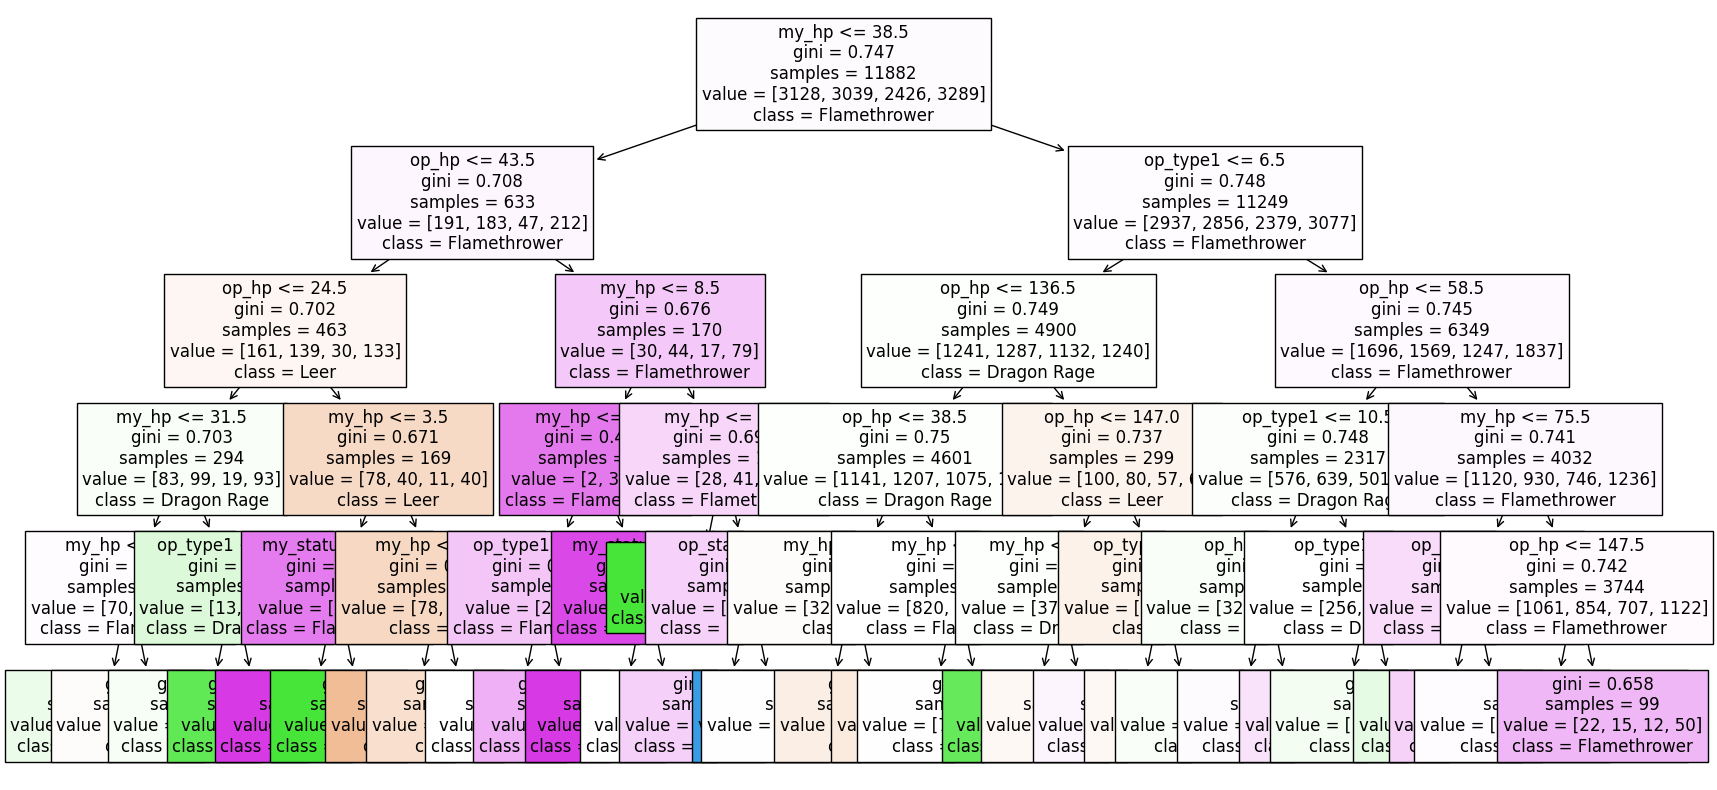

In [577]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 绘制决策树
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, filled=True, fontsize=12, feature_names=["my_hp", "op_hp", "op_type1", "my_status", "op_status"], \
          class_names=["Leer", "Dragon Rage", "Slash", "Flamethrower"])
plt.show()

In [397]:
fig.savefig('/Users/zch/Downloads/pokemon_decision_tree.png')

In [440]:
import joblib

In [582]:
# store model
joblib.dump(clf, '/Users/zch/Downloads/pokemon_decision_tree_d10_nospeed.pkl')

['/Users/zch/Downloads/pokemon_decision_tree_d10_nospeed.pkl']

In [412]:
# load model
loaded_clf = joblib.load('/Users/zch/Downloads/pokemon_decision_tree.pkl')

In [409]:
# prediction by loaded model
new_battle = [25.0, 25.0, 13.0, 0.0, 0.0, 5005.0, 3355.0]
predicted_move = loaded_clf.predict([new_battle])
move_trans ={0 : "Leer",1 : "Dragon Rage", 2 : "Slash", 3 : "Flamethrower"}

print(f"Predicted move: {move_trans[predicted_move[0]]}")

Predicted move: Flamethrower


In [413]:
print(joblib.__version__)

1.2.0


In [586]:
state = [1,2,3,4]
state = np.reshape(state, [1, 4])
state

array([[1, 2, 3, 4]])

In [588]:
s = {1:2}
print(2 in s)

False
